## Load Processed Data

In [31]:
# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/processed/tiktok_categorized.csv')

## 1. Visualize Engagement vs. Time (Hour & Day of Week)

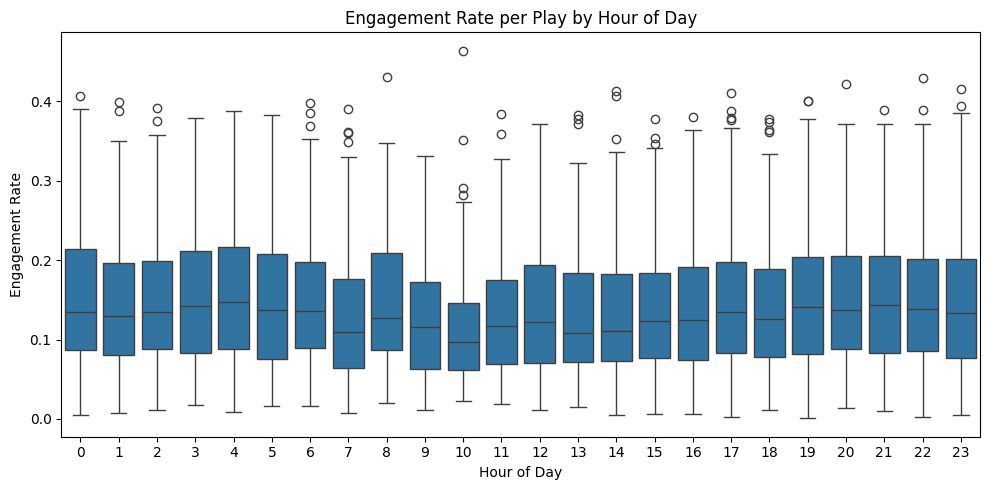

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='create_hour', y='engagement_rate_per_play', data=df)
plt.title("Engagement Rate per Play by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Engagement Rate")
plt.tight_layout()
plt.show()

### Observations for Engagement by Hour of Day:
#### Engagement Rate Is Fairly Consistent Across Hours
1. The median engagement rate stays relatively stable between ~0.10 to ~0.15 throughout the 24-hour period.
2. This suggests that posting time alone may not be the dominant factor for driving engagement.

#### Slightly Higher Engagement Between Midnight to 5 AM
1. Hours 0 to 5 (i.e., midnight to early morning) appear to have slightly higher medians and a wider interquartile range.
2. Creators might see greater variability but also greater upside potential during these off-peak hours.

#### Outliers Present Across All Hours
1. Almost every hour shows high-engagement outliers, indicating viral potential is possible at any time, but rare.
2. These are likely influenced by content quality, trends, or algorithm boosts rather than timing alone.

#### Reduced Engagement Around 10 AM – 12 PM
1. The lower medians during late morning (e.g., hour 10) may suggest these are less optimal posting windows for engagement.

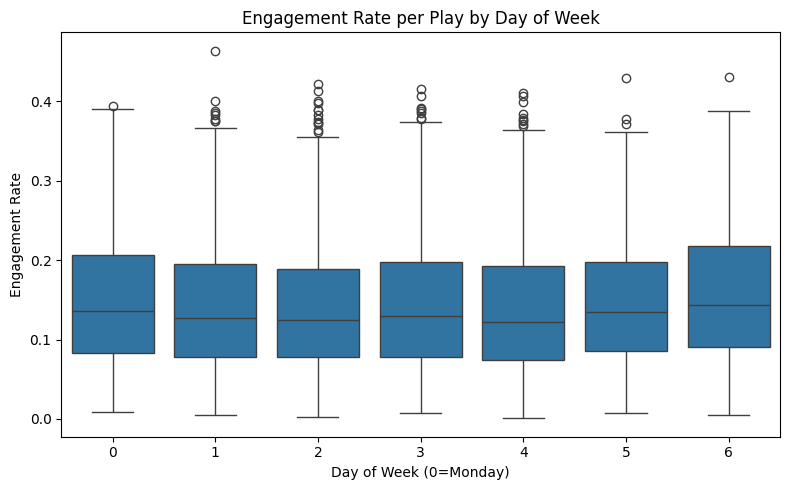

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_week', y='engagement_rate_per_play', data=df)
plt.title("Engagement Rate per Play by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Engagement Rate")
plt.tight_layout()
plt.show()

### Observations for Engagement by Day of Week:
#### Engagement Rate Is Fairly Consistent Across Hours
1. Among all days, Sunday clearly shows the highest median and wider upper quartile.
2. This suggests that audiences are more engaged on Sundays, possibly due to more free time and higher content consumption.

#### Monday (Day 0) is a Close Second
1. Engagement also appears to be relatively high on Mondays, which might reflect people browsing content during work breaks or after weekend activity follow-ups.

#### Midweek Days (Tuesday to Thursday) Show Lower Median Engagement
1. Days 1–4 (Tuesday–Friday) have lower medians and similar IQRs, indicating more average and consistent engagement.
2. This could be due to work/school routines impacting user attention and content browsing.

#### Outliers Occur on All Days
1. Every day includes high-performing outliers, meaning viral content can succeed any day if it's compelling and well-targeted.
2. Timing is not a strict limiter of virality.

## 2. Sentiment vs. Popularity (Engagement Rate)

#####             (REFERENCE) Sentiment Polarity and Subjectivity Scale (Typical for TextBlob / VADER)
| Polarity Value    | Meaning             | Example                      |
|-------------------|---------------------|------------------------------|
| **-1.0 to < 0**       | Negative sentiment  | "I hate this"                |
| **0**                 | Neutral sentiment   | "Just a regular day"         |
| **> 0 to 1.0**        | Positive sentiment  | "I love it!"                 |

| Subjectivity Score | Interpretation   | Example Caption               |
| ------------------ | ---------------- | ----------------------------- |
| **0.0**            | Very Objective   | “Video uploaded today.”       |
| **\~0.5**          | Mixed or Neutral | “It might be a fun idea.”     |
| **1.0**            | Very Subjective  | “This is absolutely amazing!” |



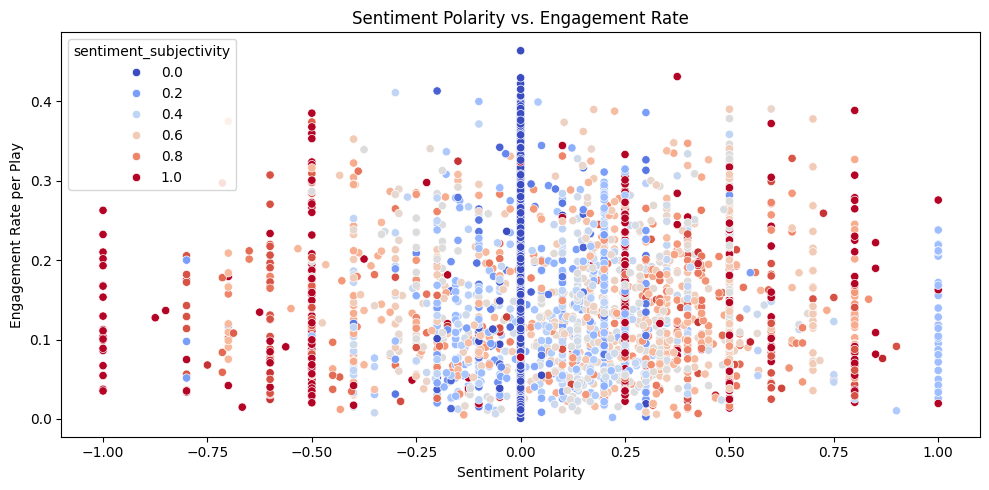

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sentiment_polarity', y='engagement_rate_per_play', data=df, hue='sentiment_subjectivity', palette='coolwarm')
plt.title("Sentiment Polarity vs. Engagement Rate")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Engagement Rate per Play")
plt.tight_layout()
plt.show()

### Key Interpretations
#### Engagement Happens Across the Sentiment Spectrum
1. Engagement Rate per Play appears across all polarity values — from strongly negative (-1.0) to strongly positive (1.0).
2. This means both positive and negative emotional tones can drive engagement, as long as the content resonates.

#### Neutral Sentiment (Polarity ≈ 0) Dominates Volume
1. A large cluster around polarity = 0 shows neutral descriptions are most common.
2. However, these neutral posts are less likely to reach the higher engagement extremes.

### Highly Subjective Content (Red Dots) is Widely Spread
1. Redder dots (high subjectivity) appear throughout the chart, especially at the higher polarity ends.
2. This indicates that subjective, emotional content is common in both very positive and very negative posts — and it can perform well.

### High Engagement Occurs at All Sentiment Levels
1. Dots above 0.3 engagement rate appear at all sentiment levels, including:
- Negative but expressive posts (polarity < 0, high subjectivity)
- Highly positive posts (polarity > 0.5)
- Even some neutral/objective content (polarity ~ 0, low subjectivity)

## 3. Hashtag Count & Posting Time vs. Engagement

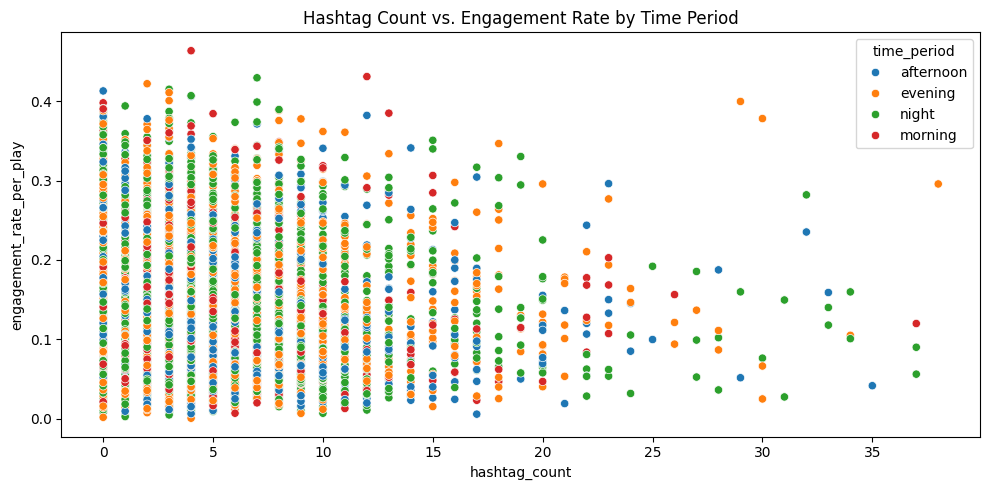

In [35]:
# Define thresholds to exclude outliers
max_hashtags = 40
max_engagement_rate = 0.5

# Filter the DataFrame
filtered_df = df[
    (df['hashtag_count'] <= max_hashtags) &
    (df['engagement_rate_per_play'] <= max_engagement_rate)
]

# Plot again with filtered data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=filtered_df,
    x='hashtag_count',
    y='engagement_rate_per_play',
    hue='time_period'
)
plt.title("Hashtag Count vs. Engagement Rate by Time Period")
plt.tight_layout()
plt.show()

### Hashtag Count vs. Engagement Rate
#### Less is More: 
The data clearly shows that videos with fewer hashtags (0-15) achieve significantly higher engagement rates, often reaching 40-45%. As hashtag count increases beyond 15, engagement rates drop dramatically, rarely exceeding 20% and often falling below 10%.

#### Sweet Spot: 
The optimal hashtag range appears to be 5-12 hashtags, where you see the highest concentration of high-engagement posts (30-45% engagement rates).<br>
Diminishing Returns: Using more than 20 hashtags appears counterproductive, with most posts achieving less than 15% engagement. This suggests TikTok's algorithm may penalize over-hashtagging or users find heavily hashtagged content less authentic.

### Posting Tome vs. Engagement Rate
#### Evening Performance: 
Evening posts (orange dots) show strong performance across all hashtag counts, with many achieving 35-40% engagement rates even with moderate hashtag usage.<br>
Night Advantage: Night posts (green dots) demonstrate the most consistent high engagement, particularly in the 5-15 hashtag range, suggesting this is when audiences are most active and engaged.
#### Morning Struggles: 
Morning posts (red dots) show more scattered results and generally lower peak engagement rates compared to evening/night posts.<br>
Afternoon Moderate: Afternoon posts (blue dots) show steady but not exceptional performance across hashtag ranges.

# 4. Tiktok Content Category Analysis

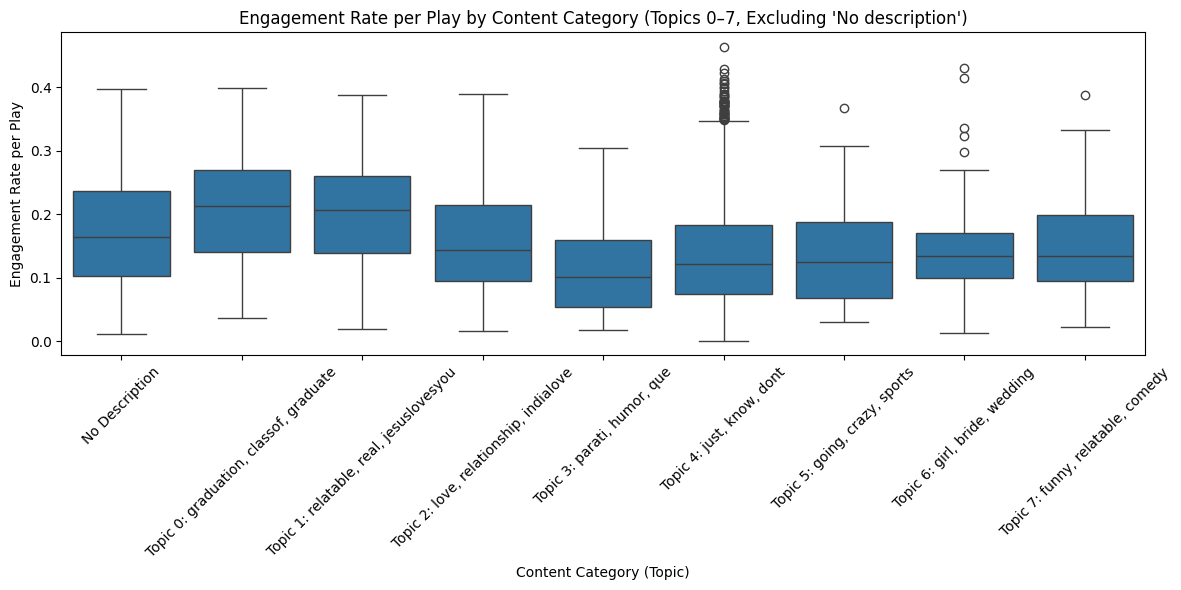

In [36]:
# Engagement rate by content category

# Exclude rows where content_description is "No Description" or -1.0
filtered_df = df[~df['content_description'].isin(["No Description", -1.0])].copy()

# Ensure the order matches unique sorted values in filtered_df['content_category']
order = sorted(filtered_df['content_category'].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='content_category',
    y='engagement_rate_per_play',
    data=filtered_df,
    order=order
)
plt.title("Engagement Rate per Play by Content Category (Topics 0–7, Excluding 'No description')")
plt.xlabel("Content Category (Topic)")
plt.ylabel("Engagement Rate per Play")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Content Category vs. Engagement Rate
#### Educational Content Wins: 
Graduation/class/educational content (Topic 0) consistently delivers the highest engagement rates, with median performance around 23-25% and reliable reach up to 40%.
#### Relatable Content Performs Strong: 
Response/relatable content (Topic 1) shows similarly high performance with consistent 20-25% engagement rates, indicating audiences connect well with authentic, responsive content.
#### Humor Content Underperforms: 
Great/humor/rule content (Topic 3) shows the weakest performance with median engagement around 8-10%, suggesting pure comedy doesn't resonate as well with this account's audience.
#### Relationship Content is High-Risk/High-Reward: 
Love/relationship content (Topic 2) shows extreme variability - it can either flop or perform very well, making it unpredictable for consistent growth.

### Viral Potential by Category
#### Consistent Performers: 
Topics 0 and 1 offer the most reliable path to good engagement without major risks of poor performance.
#### Viral Outliers: 
Topic 4 (Just/Know/Want) produces occasional viral hits (45%+ engagement) despite moderate average performance, suggesting certain angles within this category can breakthrough.
#### Safe Bets: 
Topics 5, 6, and 7 provide steady but modest engagement around 10-15%, making them reliable filler content.

# 5. Correlation Matrix

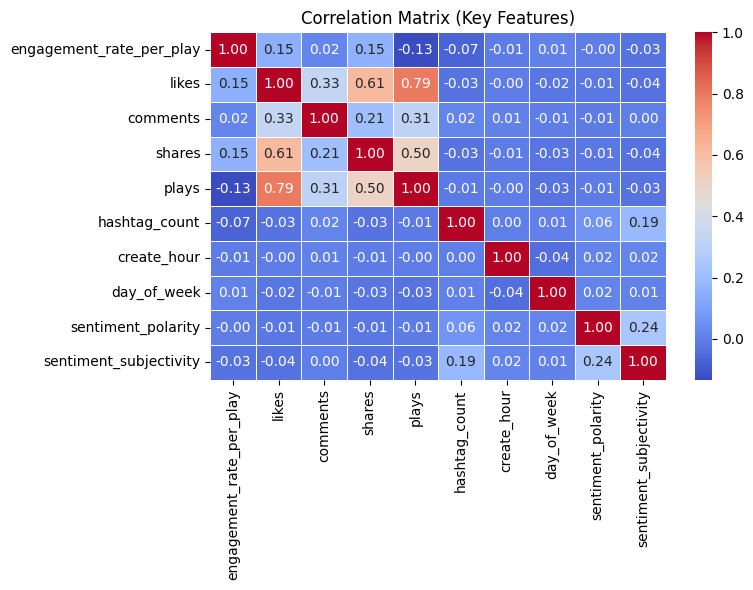

In [43]:
# Correlation matrix
cols_of_interest = [
    'engagement_rate_per_play', 'likes', 'comments', 'shares', 'plays',
    'hashtag_count', 'create_hour', 'day_of_week', 'sentiment_polarity', 'sentiment_subjectivity'
]
corr = df[cols_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Key Features)")
plt.tight_layout()
plt.show()

#### Strong Positive Correlations (High Impact Features)

<b>Likes Drive Everything. Likes show the strongest correlations with other engagement metrics:</b>

<b>Likes ↔ Plays (0.79):</b> High correlation indicates that likeable content gets more replays/shares<br>
<b>Likes ↔ Shares (0.61):</b> Popular content gets shared more frequently<br>
<b>Likes ↔ Comments (0.33):</b> Liked content generates more discussion<br>
<b>Shares and Plays Connection (0.50):</b> Content that gets shared also tends to get more plays, suggesting viral potential.

#### Weak Correlations (Limited Impact Features)
<b>Hashtag Count Has Minimal Impact:</b> Hashtag count shows very weak correlations with all engagement metrics (-0.07 to 0.02), confirming our earlier finding that hashtag quantity doesn't drive engagement.<br>

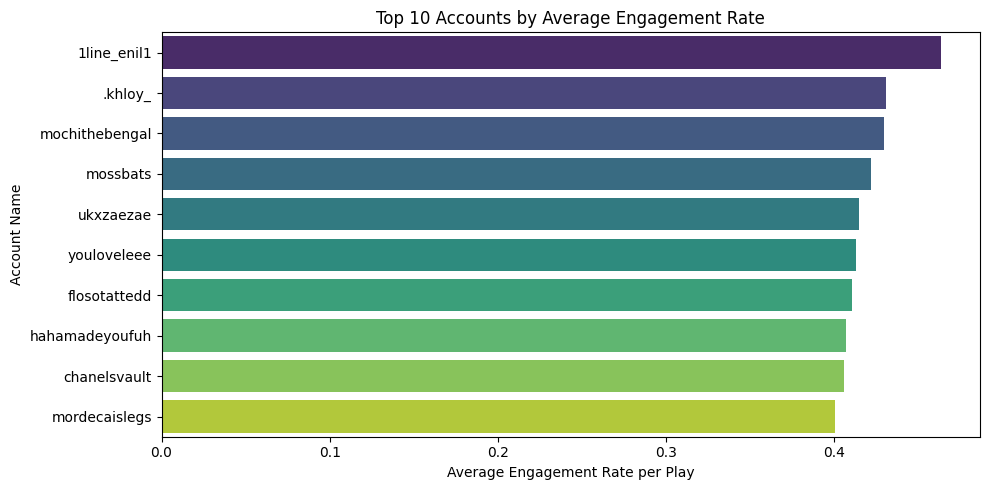

In [42]:
# Top 10 accounts by average engagement rate
top_accounts = df.groupby('author')['engagement_rate_per_play'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_accounts.values,
    y=top_accounts.index,
    hue=top_accounts.index,      # Assign hue to author (index)
    palette='viridis',
    legend=False                 # Hide legend since y-axis already shows account names
)
plt.title("Top 10 Accounts by Average Engagement Rate")
plt.xlabel("Average Engagement Rate per Play")
plt.ylabel("Account Name")
plt.tight_layout()
plt.show()

#### Tight Competition: 
The engagement rates are remarkably close, with only a 5% difference between #1 and #10, indicating these accounts have all mastered high-engagement content strategies.
#### Consistently High Performance: 
All top 10 accounts maintain 40%+ engagement rates, which is exceptionally high compared to typical social media benchmarks (usually 1-3%).
#### Niche Success: 
The variety of account names suggests different content niches can achieve elite engagement levels, from personal brands to specific interests (like "mochithebengal" suggesting pet content).